In [1]:
import qiskit
from gate_variants.toffoli_variants import CCX_Variant_Gate
from qiskit.compiler import transpile

In [2]:
qc = qiskit.circuit.QuantumCircuit(3)
qc.append(CCX_Variant_Gate(variant_tag=('01','02','p')),[0,1,2])

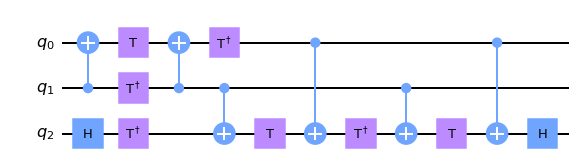

In [3]:
trans_qc = transpile(qc, optimization_level=3)
trans_qc.draw(output='mpl')

In [4]:
qc_0 = qiskit.circuit.QuantumCircuit(12)
qc_0.append(CCX_Variant_Gate(variant_tag=('01','02','s')),[0,1,2])
qc_0.append(CCX_Variant_Gate(variant_tag=('12','01','s')),[3,4,5])
qc_0.append(CCX_Variant_Gate(variant_tag=('02','01','p')),[6,7,8])
qc_0.append(CCX_Variant_Gate(variant_tag=('01','12','p')),[9,10,11])

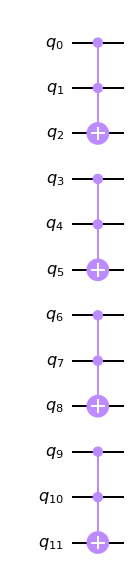

In [5]:
qc_0.draw(output = 'mpl')

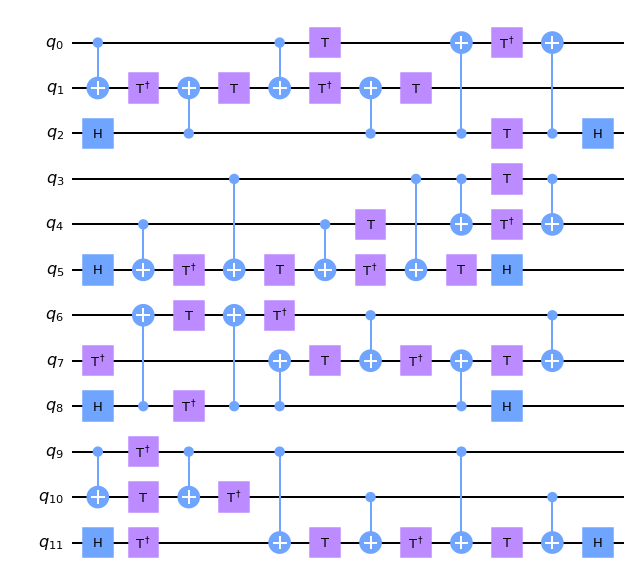

In [6]:
basis_gate_set = ['id', 'rz', 'sx', 'x', 'cx', 'reset']
trans_qc0 = transpile(qc_0, optimization_level=3)
trans_qc0.draw(output='mpl')

In [7]:
#benchmark is copied from https://github.com/jmbaker94/quantumcircuitbenchmarks/tree/master/quantumcircuitbenchmarks
#CNX is the same as multi-controlled toffoli
def cnx_halfdirty(circuit, controls, target, ancilla):
    if len(controls) == 2:
        circuit.toffoli(controls[0], controls[1], target)
    elif len(controls) == 1:
        circuit.cx(controls[0], target)
    else:
        bits = []
        bits.append(controls[0])
        
        for i in range(1, len(controls) - 1):
            bits.append(controls[i])
            bits.append(ancilla[i-1])
        bits.append(controls[-1])
        bits.append(target)
        
        for i in range(len(bits) - 1, 0, -2):
            circuit.toffoli(bits[i-2], bits[i-1], bits[i])
        
        for i in range(4, len(bits) - 2, 2):
            circuit.toffoli(bits[i-2], bits[i-1], bits[i])
            
        for i in range(len(bits) - 1, 0, -2):
            circuit.toffoli(bits[i-2], bits[i-1], bits[i])
            
        for i in range(4, len(bits) - 2, 2):
            circuit.toffoli(bits[i-2], bits[i-1], bits[i])

def generate_cnx_halfdirty(n):
    c = qiskit.circuit.QuantumCircuit(n)
    
    qs = range(n)
    
    assert (n + 3) % 2 == 0
    
    reg_len = int((n + 3)  / 2)
    cnx_halfdirty(c, qs[:reg_len -1], qs[reg_len -1], qs[reg_len:])
    return c

In [8]:
circuit = generate_cnx_halfdirty(5)

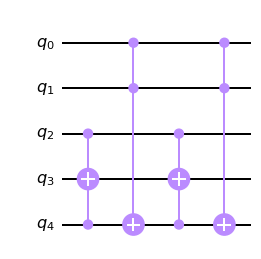

In [9]:
circuit.draw(output = 'mpl')

In [10]:
trans_orign = transpile(circuit, optimization_level=3, basis_gates = basis_gate_set)

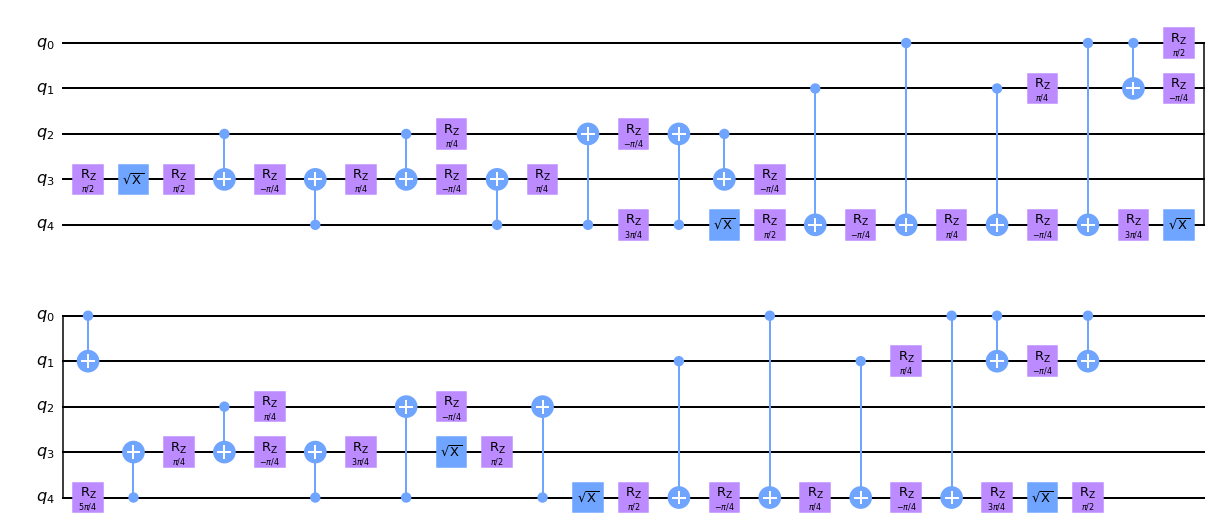

In [11]:
trans_orign.draw(output = 'mpl')

In [12]:
trans_orign.count_ops()

OrderedDict([('rz', 33), ('cx', 24), ('sx', 6)])

In [13]:
c = qiskit.circuit.QuantumCircuit(5)

c.append(CCX_Variant_Gate(variant_tag=('01','02','s')),[2,4,3])
c.append(CCX_Variant_Gate(variant_tag=('12','01','s')),[0,1,4])
c.append(CCX_Variant_Gate(variant_tag=('02','01','p')),[2,4,3])
c.append(CCX_Variant_Gate(variant_tag=('01','12','p')),[0,1,4])

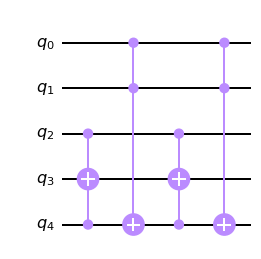

In [14]:
c.draw(output = "mpl")

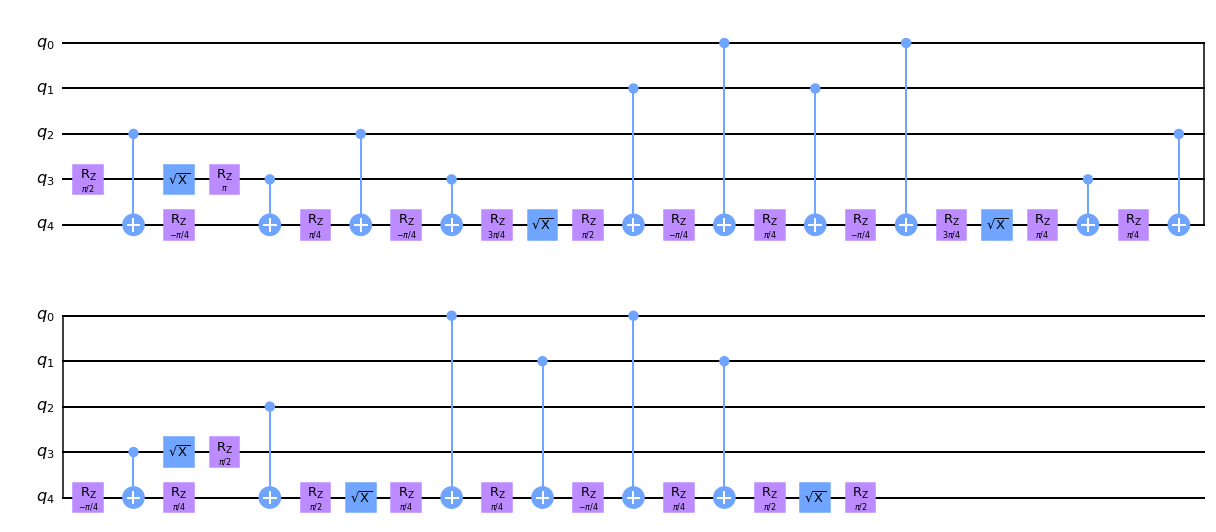

In [15]:
trans_qc = transpile(c, optimization_level=3, basis_gates=basis_gate_set)
trans_qc.draw(output='mpl')

In [16]:
trans_qc.count_ops()

OrderedDict([('rz', 23), ('cx', 16), ('sx', 6)])

In [17]:
trans_orign.count_ops()

OrderedDict([('rz', 33), ('cx', 24), ('sx', 6)])

In [18]:
#CNOT reduction
1-16/24

0.33333333333333337